In [1]:
# Install the required libraries
!pip install prophet

In [2]:
# import dependencies
import pandas as pd
import datetime as dt
from prophet import Prophet

In [3]:
# read in csv
# set index to 'Date'
# set 'Date' to datetime
df = pd.read_csv('resources/S&P 500 Index Data 1927 - 2020.csv',
                index_col= 'Date',
                parse_dates= True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0
1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0
1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0
1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0


In [4]:
# keep only the 'Close' column
# use .info() to explore dataframe
# drop any nulls
sp500_df = df[['Close']].dropna()
sp500_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 23323 entries, 1927-12-30 to 2020-11-04
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   23323 non-null  float64
dtypes: float64(1)
memory usage: 364.4 KB


<Axes: xlabel='Date'>

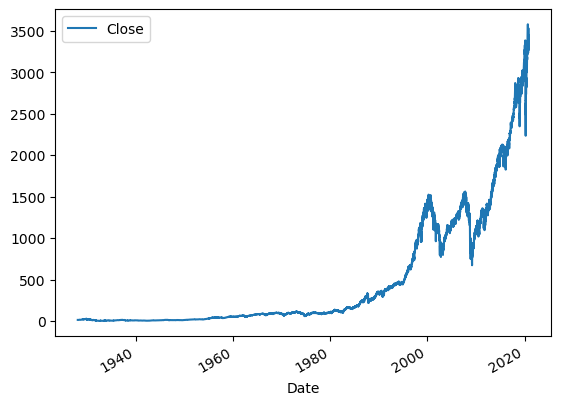

In [5]:
sp500_df.plot()

In [6]:
# drop columns 'Open', 'High', 'Low', 'Volume'
sp500_df = df.drop(columns= ['Open', 'High', 'Low', 'Volume', 'Adj Close']).dropna()
sp500_df.head()

,Close
Date,
1927-12-30,17.660000
1928-01-03,17.760000
1928-01-04,17.719999
1928-01-05,17.549999
1928-01-06,17.660000


In [7]:
# take the average of the 'Close' column by month
monthly_average = sp500_df.groupby(sp500_df.index.to_period('M')).mean()
monthly_average.head()

,Close
Date,
1927-12,17.660000
1928-01,17.520000
1928-02,17.324211
1928-03,18.233182
1928-04,19.371000


In [8]:
# change the index to a datetime
monthly_average.index = monthly_average.index.to_timestamp()
monthly_average.head()

,Close
Date,
1927-12-01,17.660000
1928-01-01,17.520000
1928-02-01,17.324211
1928-03-01,18.233182
1928-04-01,19.371000


In [9]:
# Reset the index so that we recode the columns for Prophet
monthly_average = monthly_average.reset_index()

In [10]:
# Label the columns ds and y so that the syntax is recognized by Prophet
monthly_average = monthly_average.rename(columns= {'Date': 'ds', 'Close': 'y'})

In [11]:
# View dataframe shape, and the first and last five rows of the mercado_prophet_df DataFrame
display(monthly_average.shape)
display(monthly_average.head())
display(monthly_average.tail())

(1116, 2)

,ds,y
0,1927-12-01,17.660000
1,1928-01-01,17.520000
2,1928-02-01,17.324211
3,1928-03-01,18.233182
4,1928-04-01,19.371000


,ds,y
1111,2020-07-01,3207.619096
1112,2020-08-01,3391.710019
1113,2020-09-01,3365.516671
1114,2020-10-01,3418.699996
1115,2020-11-01,3374.279948


In [12]:
# Sort the DataFrame by `ds` in ascending order
monthly_average = monthly_average.sort_values(by=["ds"], ascending=True)

# Display sample data from head and tail
display(monthly_average.head(10))
display(monthly_average.tail(10))

,ds,y
0,1927-12-01,17.660000
1,1928-01-01,17.520000
2,1928-02-01,17.324211
3,1928-03-01,18.233182
4,1928-04-01,19.371000
5,1928-05-01,20.004091
6,1928-06-01,18.985238
7,1928-07-01,19.155714
8,1928-08-01,19.793478
9,1928-09-01,21.173158


,ds,y
1106,2020-02-01,3277.314183
1107,2020-03-01,2652.393632
1108,2020-04-01,2761.975226
1109,2020-05-01,2919.608484
1110,2020-06-01,3104.660933
1111,2020-07-01,3207.619096
1112,2020-08-01,3391.710019
1113,2020-09-01,3365.516671
1114,2020-10-01,3418.699996
1115,2020-11-01,3374.279948


In [13]:
#911 DATA

In [14]:
# reduce the dataset to only the period from September 1991 to October 2001
monthly_average_911_forecast = monthly_average.loc[(monthly_average["ds"] >= "1992-01") & (monthly_average["ds"] <= "2001-08")]
display(monthly_average_911_forecast.head(10))
display(monthly_average_911_forecast.tail(10))

,ds,y
769,1992-01-01,416.074997
770,1992-02-01,412.555791
771,1992-03-01,407.364545
772,1992-04-01,407.407144
773,1992-05-01,414.814502
774,1992-06-01,408.274547
775,1992-07-01,415.051364
776,1992-08-01,417.927143
777,1992-09-01,418.477142
778,1992-10-01,412.502729


,ds,y
875,2000-11-01,1375.037603
876,2000-12-01,1330.929498
877,2001-01-01,1335.639056
878,2001-02-01,1305.751580
879,2001-03-01,1185.850009
880,2001-04-01,1189.837000
881,2001-05-01,1270.368636
882,2001-06-01,1238.710467
883,2001-07-01,1204.449521
884,2001-08-01,1178.503928


<Axes: xlabel='ds'>

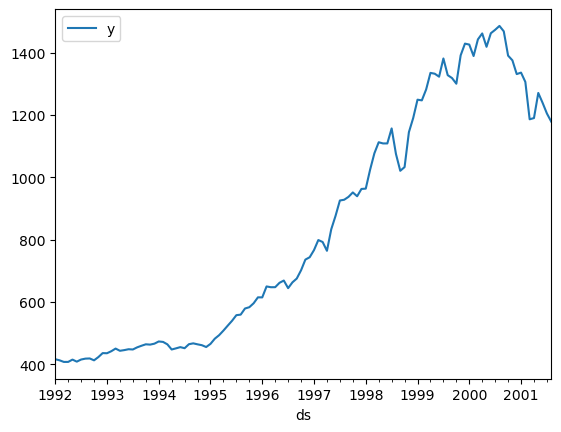

In [15]:
# plot the data
monthly_average_911_forecast.plot(x = 'ds', y = 'y')

In [16]:
# Call the Prophet function, store as an object
model_911_SP = Prophet()
model_911_SP

In [17]:
# Fit the Prophet model.
model_911_SP.fit(monthly_average_911_forecast)

19:13:11 - cmdstanpy - INFO - Chain [1] start processing
19:13:11 - cmdstanpy - INFO - Chain [1] done processing


In [18]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 3 years
future_911_SP = model_911_SP.make_future_dataframe(periods=36, freq='M')

# View the last five rows of the predictions
future_911_SP.tail()

/opt/anaconda3/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


,ds
147,2004-03-31
148,2004-04-30
149,2004-05-31
150,2004-06-30
151,2004-07-31


In [19]:
# Make the predictions for the trend data using the future_trends DataFrame
future_911_SP = model_911_SP.predict(future_911_SP)

# Display the first five rows of the forecast DataFrame
future_911_SP.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1992-01-01,390.229884,339.198680,477.170064,390.229884,390.229884,15.411161,15.411161,15.411161,15.411161,15.411161,15.411161,0.0,0.0,0.0,405.641045
1,1992-02-01,393.429673,342.056235,463.280030,393.429673,393.429673,9.205705,9.205705,9.205705,9.205705,9.205705,9.205705,0.0,0.0,0.0,402.635377
2,1992-03-01,396.423023,349.777034,479.939650,396.423023,396.423023,19.281462,19.281462,19.281462,19.281462,19.281462,19.281462,0.0,0.0,0.0,415.704485
3,1992-04-01,399.622811,337.074800,468.482151,399.622811,399.622811,-0.890129,-0.890129,-0.890129,-0.890129,-0.890129,-0.890129,0.0,0.0,0.0,398.732682
4,1992-05-01,402.719380,337.661589,469.118608,402.719380,402.719380,-1.313655,-1.313655,-1.313655,-1.313655,-1.313655,-1.313655,0.0,0.0,0.0,401.405726


/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


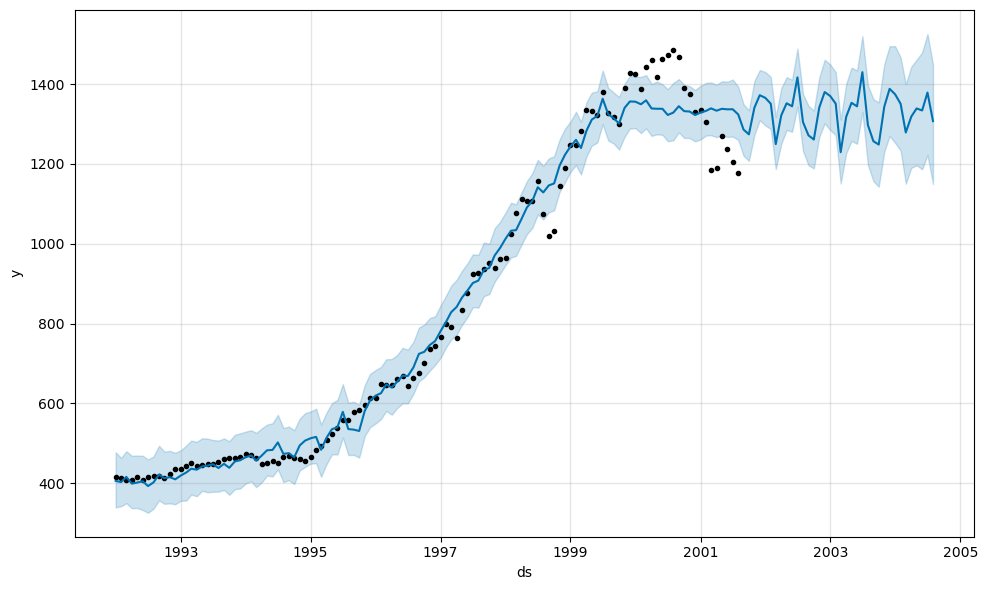

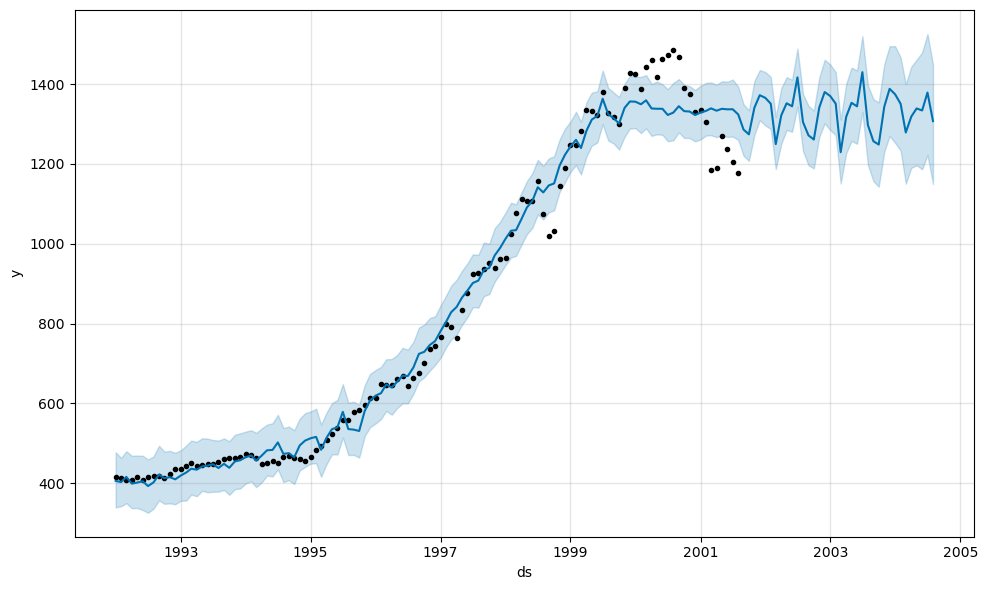

In [20]:
# Plot the Prophet predictions for the Mercado trends data
model_911_SP.plot(future_911_SP)

/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call 

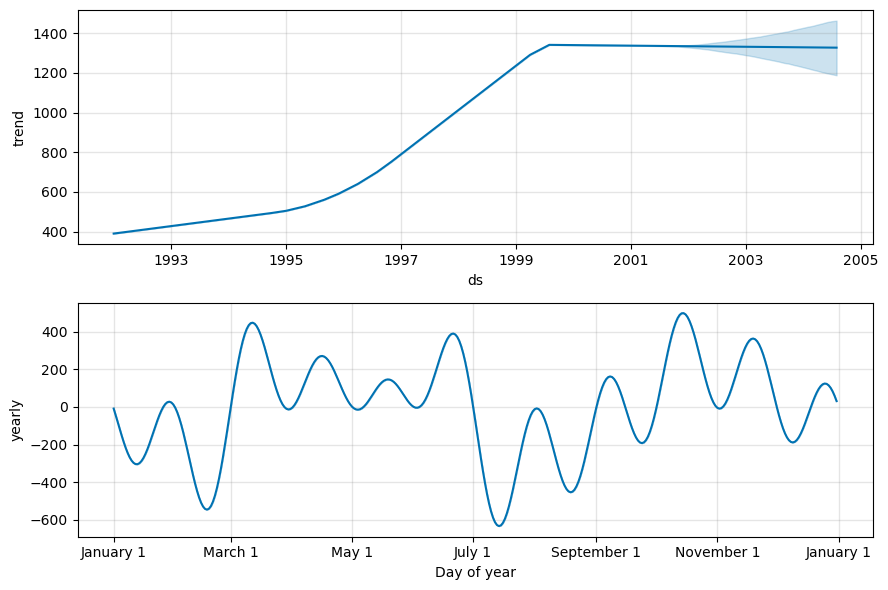

In [21]:
# Use the plot_components function to visualize the forecast results 
figures_911_SP = model_911_SP.plot_components(future_911_SP)

In [22]:
# At this point, it's useful to set the `datetime` index of the forecast data.
future_911_SP = future_911_SP.set_index(["ds"])
future_911_SP.head()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,
1992-01-01,390.229884,339.198680,477.170064,390.229884,390.229884,15.411161,15.411161,15.411161,15.411161,15.411161,15.411161,0.0,0.0,0.0,405.641045
1992-02-01,393.429673,342.056235,463.280030,393.429673,393.429673,9.205705,9.205705,9.205705,9.205705,9.205705,9.205705,0.0,0.0,0.0,402.635377
1992-03-01,396.423023,349.777034,479.939650,396.423023,396.423023,19.281462,19.281462,19.281462,19.281462,19.281462,19.281462,0.0,0.0,0.0,415.704485
1992-04-01,399.622811,337.074800,468.482151,399.622811,399.622811,-0.890129,-0.890129,-0.890129,-0.890129,-0.890129,-0.890129,0.0,0.0,0.0,398.732682
1992-05-01,402.719380,337.661589,469.118608,402.719380,402.719380,-1.313655,-1.313655,-1.313655,-1.313655,-1.313655,-1.313655,0.0,0.0,0.0,401.405726


In [23]:
# reduce the dataset to only the period from January 1992 to December 2011
monthly_average_911_actual = monthly_average.loc[(monthly_average["ds"] >= "1992-01") & (monthly_average["ds"] <= "2004-07")]
display(monthly_average_911_actual.head(10))
display(monthly_average_911_actual.tail(10))

,ds,y
769,1992-01-01,416.074997
770,1992-02-01,412.555791
771,1992-03-01,407.364545
772,1992-04-01,407.407144
773,1992-05-01,414.814502
774,1992-06-01,408.274547
775,1992-07-01,415.051364
776,1992-08-01,417.927143
777,1992-09-01,418.477142
778,1992-10-01,412.502729


,ds,y
910,2003-10-01,1038.734343
911,2003-11-01,1049.898945
912,2003-12-01,1080.635920
913,2004-01-01,1132.517499
914,2004-02-01,1143.356323
915,2004-03-01,1123.978245
916,2004-04-01,1133.078573
917,2004-05-01,1102.781500
918,2004-06-01,1132.757156
919,2004-07-01,1105.846656


<Axes: xlabel='ds'>

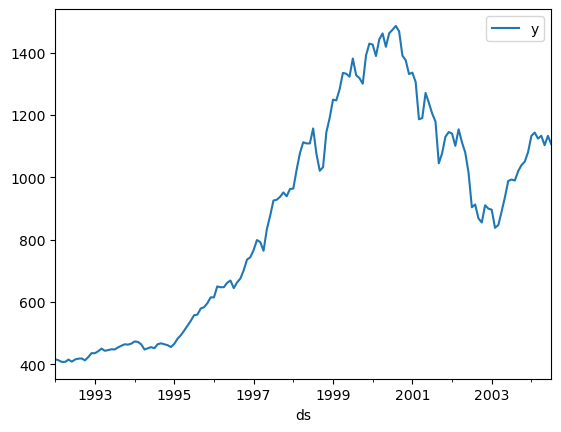

In [24]:
# Plot the data
monthly_average_911_actual.plot(x = 'ds', y = 'y')

In [25]:
#Katrina DATA

In [26]:
# reduce the dataset to only the period from September 1995 to August 2005
monthly_average_katrina_forecast = monthly_average.loc[(monthly_average["ds"] >= "1995-09") & (monthly_average["ds"] <= "2005-08")]
display(monthly_average_katrina_forecast.head(10))
display(monthly_average_katrina_forecast.tail(10))

,ds,y
813,1995-09-01,578.765494
814,1995-10-01,582.918182
815,1995-11-01,595.532381
816,1995-12-01,614.570999
817,1996-01-01,614.420005
818,1996-02-01,649.542004
819,1996-03-01,647.074759
820,1996-04-01,647.172854
821,1996-05-01,661.230455
822,1996-06-01,668.498993


,ds,y
923,2004-11-01,1168.937622
924,2004-12-01,1199.209545
925,2005-01-01,1181.407996
926,2005-02-01,1199.626844
927,2005-03-01,1194.897727
928,2005-04-01,1164.427612
929,2005-05-01,1178.275716
930,2005-06-01,1202.253168
931,2005-07-01,1222.236999
932,2005-08-01,1224.269998


<Axes: xlabel='ds'>

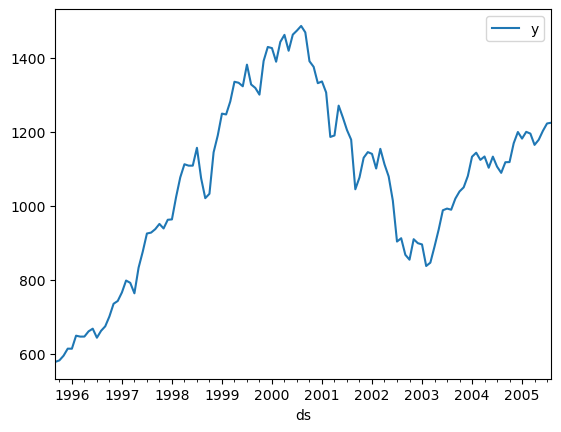

In [27]:
# plot the data
monthly_average_katrina_forecast.plot(x = 'ds', y = 'y')

In [28]:
# Call the Prophet function, store as an object
model_katrina_SP = Prophet()
model_katrina_SP


In [29]:
# Fit the Prophet model.
model_katrina_SP.fit(monthly_average_katrina_forecast)

19:14:35 - cmdstanpy - INFO - Chain [1] start processing
19:14:36 - cmdstanpy - INFO - Chain [1] done processing


In [30]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 3 years
future_katrina_SP = model_katrina_SP.make_future_dataframe(periods=36, freq='M')
# View the last five rows of the predictions
future_katrina_SP.tail()

/opt/anaconda3/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


,ds
151,2008-03-31
152,2008-04-30
153,2008-05-31
154,2008-06-30
155,2008-07-31


In [31]:
# Make the predictions for the trend data using the future_trends DataFrame
future_katrina_SP = model_katrina_SP.predict(future_katrina_SP)
# Display the first five rows of the forecast DataFrame
future_katrina_SP.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1995-09-01,519.182516,425.037331,545.527440,519.182516,519.182516,-33.565748,-33.565748,-33.565748,-33.565748,-33.565748,-33.565748,0.0,0.0,0.0,485.616767
1,1995-10-01,536.416210,429.949327,557.647721,536.416210,536.416210,-42.221152,-42.221152,-42.221152,-42.221152,-42.221152,-42.221152,0.0,0.0,0.0,494.195058
2,1995-11-01,554.224361,493.516123,612.994489,554.224361,554.224361,-3.106947,-3.106947,-3.106947,-3.106947,-3.106947,-3.106947,0.0,0.0,0.0,551.117414
3,1995-12-01,571.458055,525.556772,643.854129,571.458055,571.458055,14.825182,14.825182,14.825182,14.825182,14.825182,14.825182,0.0,0.0,0.0,586.283238
4,1996-01-01,589.266206,552.531265,671.837894,589.266206,589.266206,22.776188,22.776188,22.776188,22.776188,22.776188,22.776188,0.0,0.0,0.0,612.042394


/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


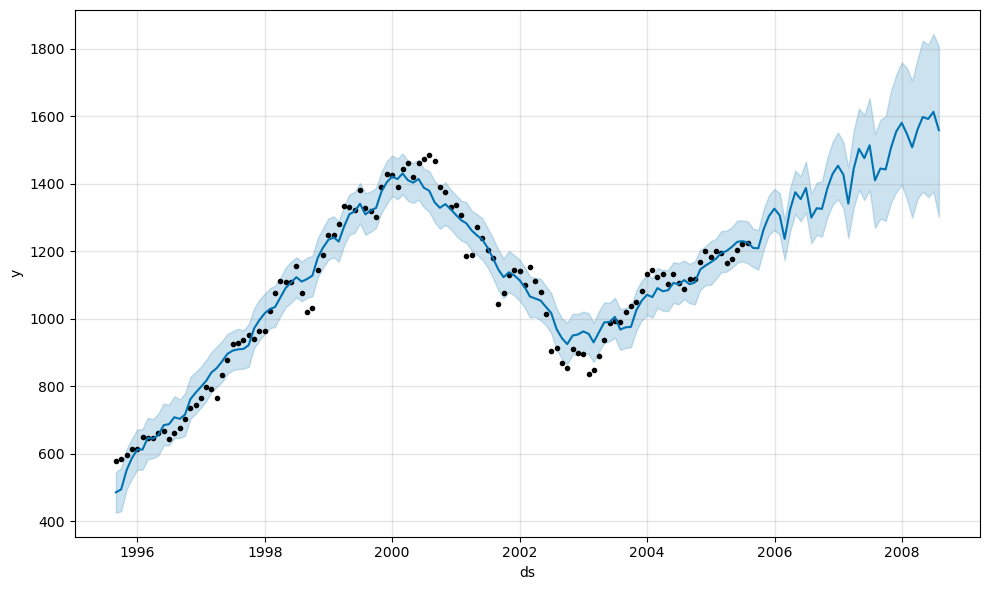

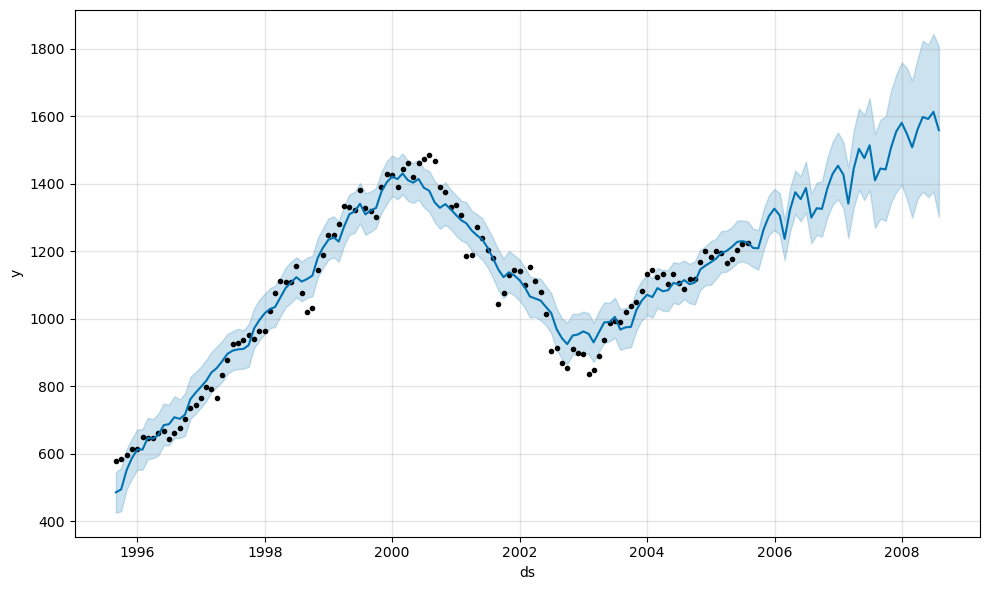

In [32]:
# Plot the Prophet predictions for the Mercado trends data
model_katrina_SP.plot(future_katrina_SP)

/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call 

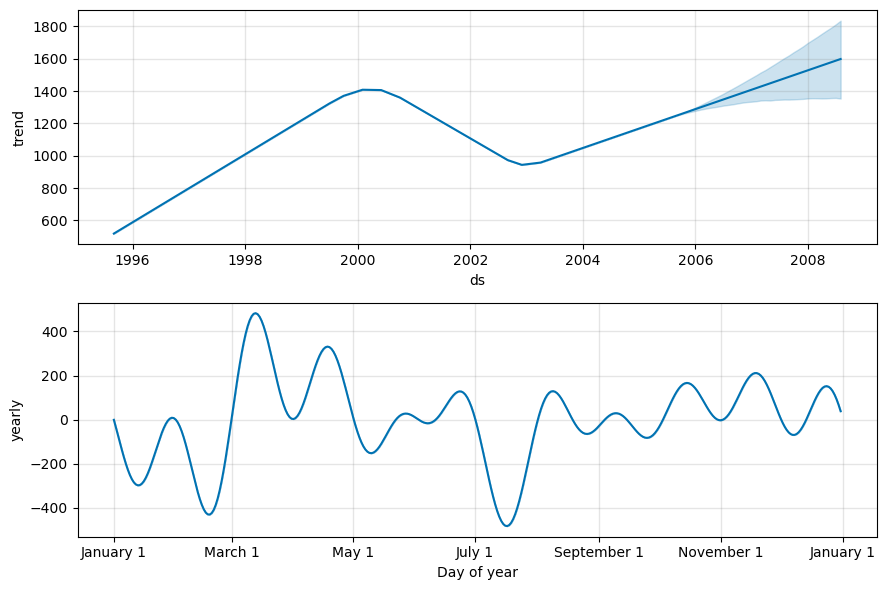

In [33]:
# Use the plot_components function to visualize the forecast results 
figures_katrina_SP = model_katrina_SP.plot_components(future_katrina_SP)

In [34]:
# At this point, it's useful to set the `datetime` index of the forecast data.
future_katrina_SP = future_katrina_SP.set_index(["ds"])
future_katrina_SP.head()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,
1995-09-01,519.182516,425.037331,545.527440,519.182516,519.182516,-33.565748,-33.565748,-33.565748,-33.565748,-33.565748,-33.565748,0.0,0.0,0.0,485.616767
1995-10-01,536.416210,429.949327,557.647721,536.416210,536.416210,-42.221152,-42.221152,-42.221152,-42.221152,-42.221152,-42.221152,0.0,0.0,0.0,494.195058
1995-11-01,554.224361,493.516123,612.994489,554.224361,554.224361,-3.106947,-3.106947,-3.106947,-3.106947,-3.106947,-3.106947,0.0,0.0,0.0,551.117414
1995-12-01,571.458055,525.556772,643.854129,571.458055,571.458055,14.825182,14.825182,14.825182,14.825182,14.825182,14.825182,0.0,0.0,0.0,586.283238
1996-01-01,589.266206,552.531265,671.837894,589.266206,589.266206,22.776188,22.776188,22.776188,22.776188,22.776188,22.776188,0.0,0.0,0.0,612.042394


In [35]:
# reduce the dataset to only the period from August 1995 to July 2015
monthly_average_katrina_actual = monthly_average.loc[(monthly_average["ds"] >= "1995-08") & (monthly_average["ds"] <= "2008-07")]
display(monthly_average_katrina_actual.head(10))
display(monthly_average_katrina_actual.tail(10))


,ds,y
812,1995-08-01,559.110001
813,1995-09-01,578.765494
814,1995-10-01,582.918182
815,1995-11-01,595.532381
816,1995-12-01,614.570999
817,1996-01-01,614.420005
818,1996-02-01,649.542004
819,1996-03-01,647.074759
820,1996-04-01,647.172854
821,1996-05-01,661.230455


,ds,y
958,2007-10-01,1539.658691
959,2007-11-01,1463.385237
960,2007-12-01,1479.223498
961,2008-01-01,1378.763806
962,2008-02-01,1354.872510
963,2008-03-01,1316.942993
964,2008-04-01,1370.469094
965,2008-05-01,1403.217617
966,2008-06-01,1341.250965
967,2008-07-01,1257.326366


<Axes: xlabel='ds'>

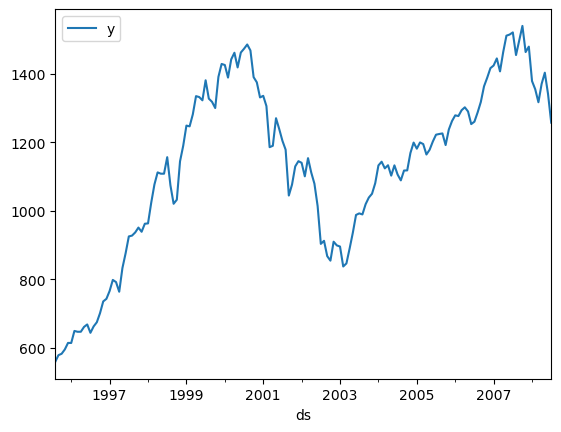

In [36]:
# Plot the data
monthly_average_katrina_actual.plot(x = 'ds', y = 'y')